In [254]:
#!pip install pandas
#!pip install numpy

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load data

In [256]:
train_data = pd.read_csv(r"data\train.csv")
test_data = pd.read_csv(r"data\test.csv")

df_all = pd.concat([train_data, test_data], sort=True).reset_index(drop=True)
display(df_all[:5])

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [257]:
print("Train_data contains: " + str(train_data.shape[0]) + "rows")
print("Test_data contains: " + str(test_data.shape[0]) + "rows")

print("Dataset has: " + str(test_data.shape[1]) + " features ")

Train_data contains: 891rows
Test_data contains: 418rows
Dataset has: 11 features 


In [258]:
print("Missings in train_data")
train_data.isnull().sum()

Missings in train_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. Data preprocessing

### 2.1 Age

<AxesSubplot:>

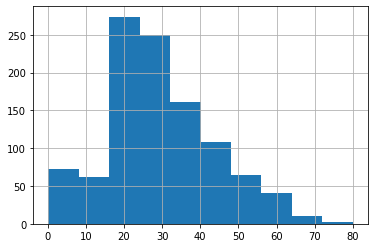

In [259]:
df_all["Age"].hist()

<AxesSubplot:ylabel='Frequency'>

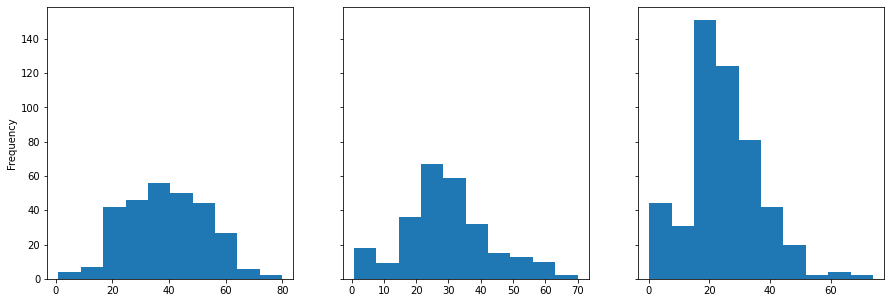

In [260]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15, 5))
df_all[df_all.Pclass == 1]["Age"].plot.hist(bins=10, ax=ax[0])
df_all[df_all.Pclass == 2]["Age"].plot.hist(bins=10, ax=ax[1])
df_all[df_all.Pclass == 3]["Age"].plot.hist(bins=10, ax=ax[2])

In [261]:
df_all.groupby(["Pclass", "Sex"])["Age"].median()

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

### 2.2 Fare

In [262]:
df_all[df_all["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [263]:
mr_Thomas_Fare = df_all[(df_all["Embarked"] == "S") & (df_all["Pclass"] == 3) & (df_all["SibSp"] == 0)]["Fare"].median()

In [264]:
df_all.loc[df_all["Name"] == "Storey, Mr. Thomas", "Fare"] = mr_Thomas_Fare

In [265]:
df_all.loc[df_all["Name"] == "Storey, Mr. Thomas"]["Fare"]

1043    7.925
Name: Fare, dtype: float64

### 2.3 Cabin

In [266]:
df_all["Cabin"].isnull().sum()

1014

In [267]:
df_all["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [268]:
df_all["Deck"] = df_all["Cabin"].apply(lambda s: s[0] if pd.notnull(s) else "M")

In [269]:
df_all[:5]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M


<AxesSubplot:xlabel='Deck'>

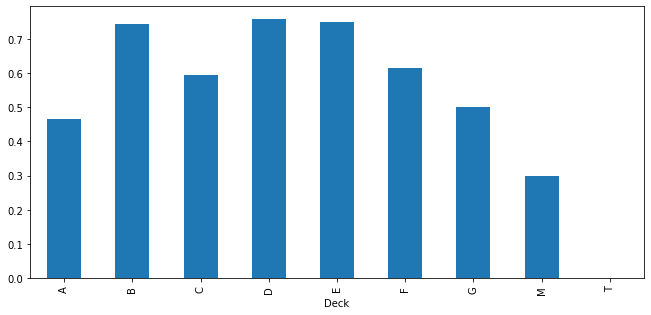

In [270]:
df_all[["Deck", "Survived"]].groupby("Deck")["Survived"].mean().plot(kind="bar", figsize = (11, 5))

In [271]:
df_all[df_all["Deck"] == "T"]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
339,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,340,1,male,0,0.0,113784,T


## 3. Feature engineering

### 3.1 Fare, binning 

In [272]:
pd.qcut(df_all["Fare"], 5).value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(7.854, 10.5]        255
(10.5, 21.558]       255
Name: Fare, dtype: int64

In [273]:
df_all["Fare"] = pd.qcut(df_all["Fare"], 5)

In [274]:
df_all["Fare"][:1]

0    (-0.001, 7.854]
Name: Fare, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.558] < (21.558, 41.579] < (41.579, 512.329]]

In [275]:
pd.cut(df_all["Age"], 7).value_counts()

(22.979, 34.383]    365
(11.574, 22.979]    243
(34.383, 45.787]    194
(45.787, 57.191]    104
(0.0902, 11.574]     91
(57.191, 68.596]     41
(68.596, 80.0]        8
Name: Age, dtype: int64

In [276]:
df_all["Age"] = pd.cut(df_all["Age"], 7)

In [277]:
df_all["Age"][:1]

0    (11.574, 22.979]
Name: Age, dtype: category
Categories (7, interval[float64, right]): [(0.0902, 11.574] < (11.574, 22.979] < (22.979, 34.383] < (34.383, 45.787] < (45.787, 57.191] < (57.191, 68.596] < (68.596, 80.0]]

<AxesSubplot:xlabel='Age,Sex'>

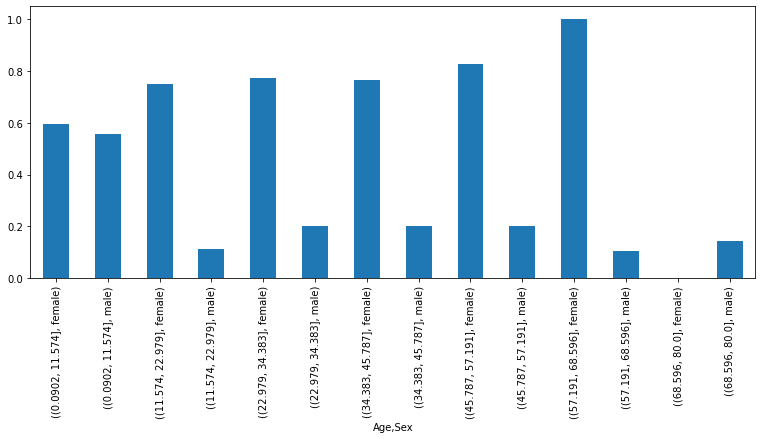

In [282]:
df_all.groupby(["Age", "Sex"])["Survived"].mean().plot(kind="bar", figsize=(13, 5))

### 3.2 Family Size

<AxesSubplot:>

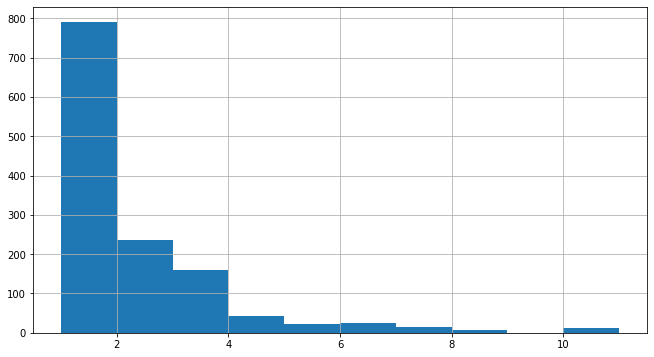

In [308]:
df_all["Family_Size"] = df_all["Parch"] + df_all["SibSp"] + 1
df_all["Family_Size"].hist(figsize=(11,6))

In [309]:
df_all[:5]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Family_Size
0,"(11.574, 22.979]",NaN,S,"(-0.001, 7.854]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,2
1,"(34.383, 45.787]",C85,C,"(41.579, 512.329]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C,2
2,"(22.979, 34.383]",NaN,S,"(7.854, 10.5]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,1
3,"(34.383, 45.787]",C123,S,"(41.579, 512.329]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C,2
4,"(34.383, 45.787]",NaN,S,"(7.854, 10.5]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,1


<AxesSubplot:xlabel='Family_Size'>

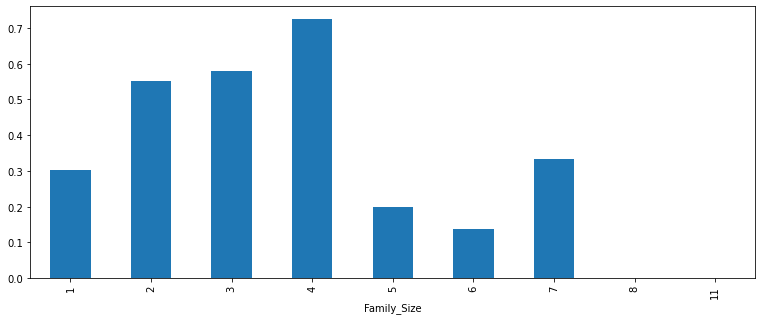

In [311]:
df_all.groupby("Family_Size")["Survived"].mean().plot(kind="bar", figsize=(13, 5))

### 3.3 Tickets

In [319]:
df_all["Ticket_Frequency"] = df_all.groupby("Ticket")["Ticket"].transform("count")

<AxesSubplot:xlabel='Ticket_Frequency'>

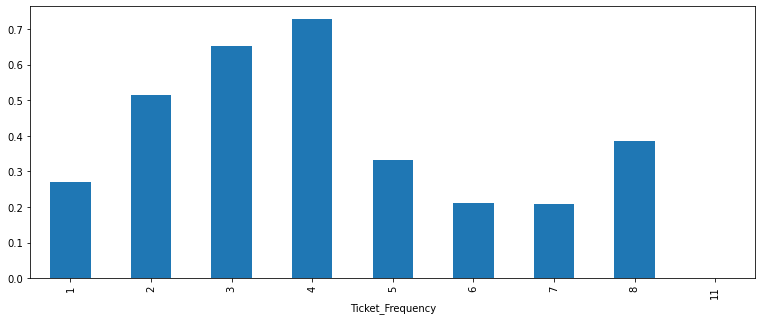

In [322]:
df_all.groupby("Ticket_Frequency")["Survived"].mean().plot(kind="bar", figsize=(13, 5))